# Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the preprocessed dataset
dataset = pd.read_csv('preprocessed_mental_health.csv')

# Check if 'cleaned_text' and 'mental_health_issue' columns exist
if 'cleaned_text' not in dataset.columns or 'mental_health_issue' not in dataset.columns:
    raise ValueError("The dataset must have 'cleaned_text' and 'mental_health_issue' columns.")

# Remove rows with missing values in 'cleaned_text' column
dataset.dropna(subset=['cleaned_text'], inplace=True)

# Initialize the CountVectorizer and fit/transform the cleaned text
LRvectorizer = CountVectorizer()
X = LRvectorizer.fit_transform(dataset['cleaned_text'])

# Prepare the target variable
y = dataset['mental_health_issue']

# Split the dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
LRmodel = LogisticRegression(multi_class='ovr', max_iter=5000)

# Train the model
LRmodel.fit(X_train, y_train)

# Make predictions on the test set
y_pred = LRmodel.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 87.66%
Classification Report:
               precision    recall  f1-score   support

     anxiety       0.83      0.77      0.80       379
     bipolar       0.74      0.55      0.63       384
  depression       0.76      0.76      0.76       373
      normal       0.92      0.99      0.95      2183
        ptsd       0.87      0.77      0.82       394

    accuracy                           0.88      3713
   macro avg       0.82      0.77      0.79      3713
weighted avg       0.87      0.88      0.87      3713

Confusion Matrix:
 [[ 291   18   27   24   19]
 [   7  213   29  125   10]
 [  26   31  283   18   15]
 [   3   10    4 2165    1]
 [  24   16   29   22  303]]


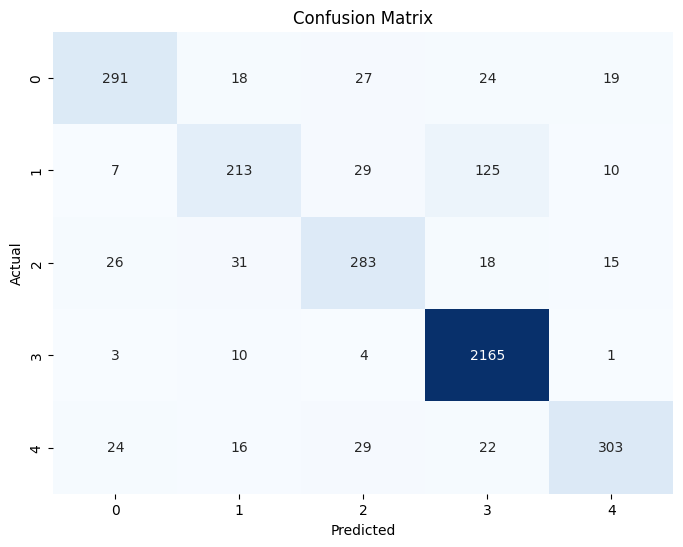

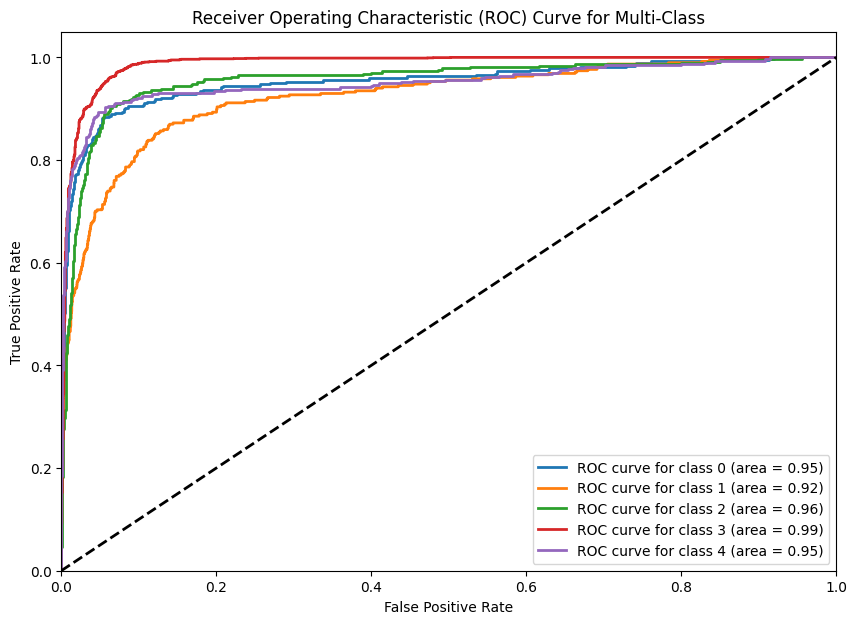

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visualize the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate ROC Curve and AUC for each class (if binary classification)
# Binarize the output
y_test_binarized = label_binarize(y_test, classes=LRmodel.classes_)
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Iterate through each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], LRmodel.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import pickle
# Save the Logistic Regression model
with open('LRmodel.pkl', 'wb') as file:
    pickle.dump(LRmodel, file)

# Save the CountVectorizer
with open('LRvectorizer.pkl', 'wb') as file:
    pickle.dump(LRvectorizer, file)


## CHANGING COLORS

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


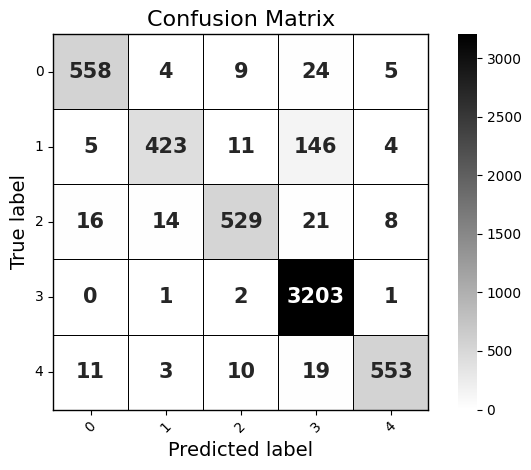

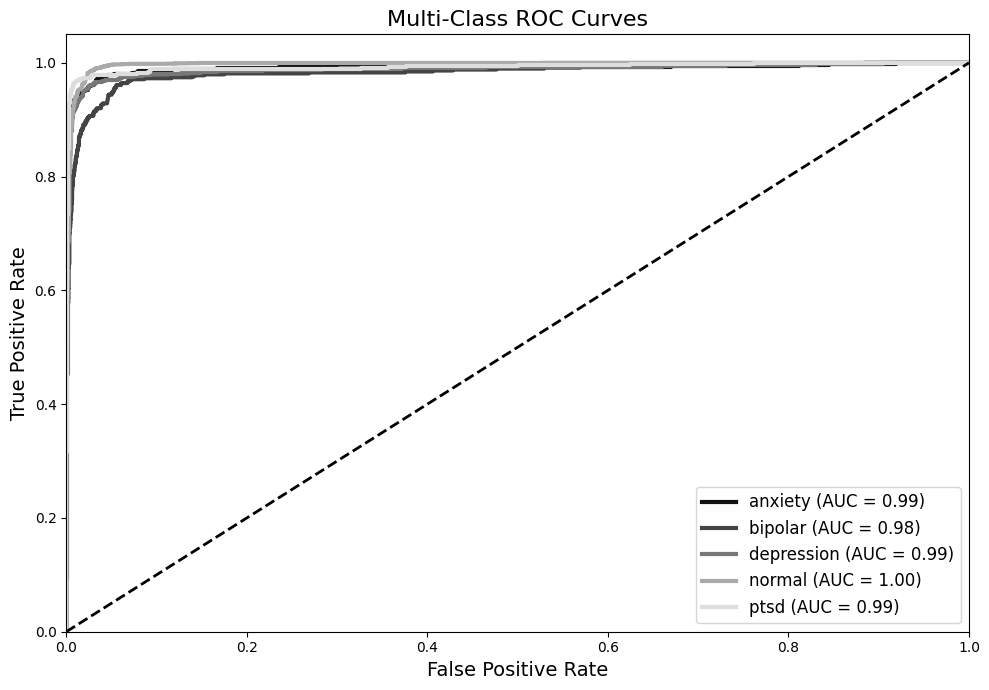

In [8]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# 1. Load your data
df = pd.read_csv('preprocessed_mental_health.csv')

# assume your CSV has 'text' and 'mental_health_issue' columns
X = df['text']
y = df['mental_health_issue']

# 2. Split off 30% for testing (same as you originally did)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# 3. Load your fitted vectorizer and model
with open('LRvectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('LRmodel.pkl', 'rb') as f:
    model = pickle.load(f)

# 4. Transform your test texts
X_test_vec = vectorizer.transform(X_test)

# 5. Predict
y_pred = model.predict(X_test_vec)
y_proba = model.predict_proba(X_test_vec)

# ----- CONFUSION MATRIX -----
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

ax = sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='gist_yarg',         # grayscale colormap with deep tones ( gist_yarg )
    cbar=True,                # color bar for value reference
    cbar_kws={'label': ''},
    annot_kws={'size':15, 'weight':'bold'},
    linewidths=0.5,           # thinner borders
    linecolor='black',
    square=True
)

# Fix bottom and right border visibility
ax.set_frame_on(True)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)


plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# ----- ROC CURVES (multi-class) -----
# 1) binarize the true labels
y_test_bin = label_binarize(y_test, classes=model.classes_)
n_classes = y_test_bin.shape[1]

# 2) compute fpr, tpr, roc_auc per class
fpr = {}
tpr = {}
roc_auc = {}
for i, lbl in enumerate(model.classes_):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 3) plot
plt.figure(figsize=(10, 7))

# choose a few distinct grey-scale shades
greys = ['#111111', '#444444', '#777777', '#AAAAAA', '#DDDDDD']
# if you have more than 5 classes, you can interpolate or repeat shades

for i, shade in zip(range(n_classes), greys):
    plt.plot(
        fpr[i],
        tpr[i],
        color=shade,
        lw=3,            # extra-thick
        label=f"{model.classes_[i]} (AUC = {roc_auc[i]:0.2f})"
    )

# diagonal chance line
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Multi-Class ROC Curves', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()
